In [1]:
!pip install -q kaggle 

In [2]:
from google.colab import files
files.upload() 

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ihebbouariche","key":"65b046214dca53420428236203d2b8c0"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json 

In [6]:
! kaggle datasets list 

ref                                                             title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ruchi798/data-science-job-salaries                              Data Science Job Salaries                        7KB  2022-06-15 08:59:12          21630        670  1.0              
josephcheng123456/olympic-historical-dataset-from-olympediaorg  Olympic Historical Dataset From Olympedia.org   25MB  2022-08-18 14:18:14            710         27  1.0              
deepcontractor/mcdonalds-india-menu-nutrition-facts             McDonald's India : Menu Nutrition Dataset        5KB  2022-07-28 17:08:52           1850         97  0.9411765        
gpreda/life-expectancy-in-europe-by-age-and-sex                 Life Expectancy in Eu

In [7]:
#copy the kaggle api commande and past it here
!kaggle datasets download -d shashankrapolu/human-action-recognition-dataset

 93% 192M/208M [00:09<00:00, 29.6MB/s]
100% 208M/208M [00:09<00:00, 23.3MB/s]


In [8]:
#unzip data file
import zipfile

path = './human-action-recognition-dataset.zip'
zip_ref = zipfile.ZipFile(path , 'r')
zip_ref.extractall()
zip_ref.close()

In [9]:
import os 
train_dir = os.path.join('/content/Structured/train')

In [10]:
classes = os.listdir(train_dir)
print(classes)

['cycling', 'laughing', 'sleeping', 'eating', 'running', 'fighting', 'hugging', 'drinking', 'texting', 'calling', 'using_laptop', 'clapping', 'sitting', 'listening_to_music', 'dancing']


In [11]:
num_output = len(classes)

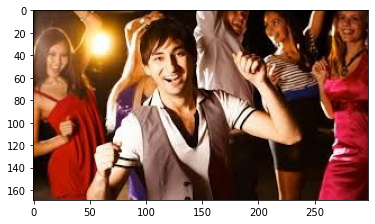

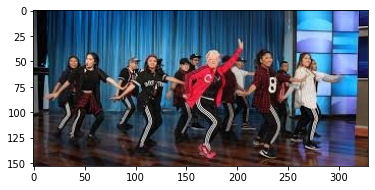

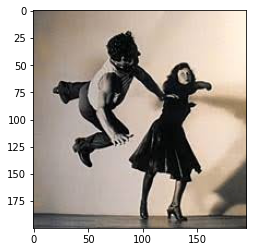

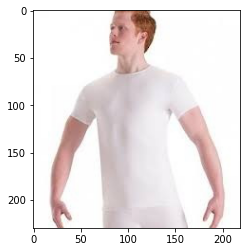

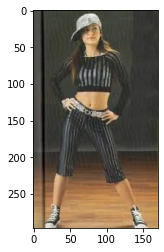

In [12]:
#plot images 
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
dancing_dir = os.path.join(train_dir,'./dancing')
example = [os.path.join(dancing_dir,fname) 
           for fname in os.listdir(dancing_dir)]
for i in range(5):
  image=mpimg.imread(example[i])
  plt.imshow(image)
  plt.show()

In [13]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
model = keras.Sequential([
    layers.Conv2D(64,3,activation="relu",input_shape = (150,150,3)),
    layers.MaxPool2D(),
    layers.Conv2D(256,3,activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(256,3,activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(256,3,activation="relu"),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(256,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_output,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 256)       147712    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       590080    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 256)      0

In [15]:
#Data preprocessing and augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_gen = ImageDataGenerator(rescale=1.0/255,
                               rotation_range = 40,
                               width_shift_range = 0.2,
                               height_shift_range = 0.2,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)

image_data = image_gen.flow_from_directory(train_dir , batch_size = 20 , class_mode = 'categorical' , target_size=(150,150) , shuffle= True)

val_dir = os.path.join('/content/Structured/test')
image_data_validation = image_gen.flow_from_directory(val_dir, target_size=(150,150))

Found 10710 images belonging to 15 classes.
Found 1890 images belonging to 15 classes.


In [16]:
model.compile(loss = 'categorical_crossentropy' , optimizer = keras.optimizers.Adam(0.00005),metrics=["accuracy"])
history = model.fit(image_data,validation_data = image_data_validation , shuffle = True , epochs = 25)

Epoch 1/25
536/536 [==============================] - 112s 184ms/step - loss: 2.6276 - accuracy: 0.1111 - val_loss: 2.5345 - val_accuracy: 0.1481
Epoch 2/25
536/536 [==============================] - 98s 182ms/step - loss: 2.4750 - accuracy: 0.1783 - val_loss: 2.3741 - val_accuracy: 0.2063
Epoch 3/25
536/536 [==============================] - 96s 179ms/step - loss: 2.3777 - accuracy: 0.2173 - val_loss: 2.3014 - val_accuracy: 0.2381
Epoch 4/25
536/536 [==============================] - 98s 182ms/step - loss: 2.3251 - accuracy: 0.2352 - val_loss: 2.2596 - val_accuracy: 0.2508
Epoch 5/25
536/536 [==============================] - 95s 178ms/step - loss: 2.2849 - accuracy: 0.2517 - val_loss: 2.2191 - val_accuracy: 0.2757
Epoch 6/25
536/536 [==============================] - 95s 178ms/step - loss: 2.2368 - accuracy: 0.2636 - val_loss: 2.2082 - val_accuracy: 0.2725
Epoch 7/25
536/536 [==============================] - 96s 179ms/step - loss: 2.2096 - accuracy: 0.2724 - val_loss: 2.1712 - val_a

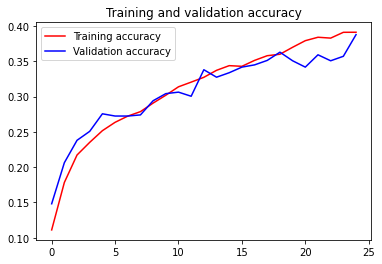

<Figure size 432x288 with 0 Axes>

overfitting problem solved but the model need to be more trained and optimized


In [17]:
#plot the training and validation accuracy graphs 
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()
print('overfitting problem solved but the model need to be more trained and optimized')

In [18]:
#as you see the training and validation accuracy increase over epochs and the amout steel high until the finil epoch
#there are not an overfitting
#the accuracy is 40% and tha amout still high it mean that we need more long time on training (more rpochs)
#for more performance and accuracy train the model for long time (increase the number of epochs)

In [19]:
history2 = model.fit(image_data,validation_data = image_data_validation , shuffle = True , epochs = 25)

Epoch 1/25
536/536 [==============================] - 96s 180ms/step - loss: 1.8355 - accuracy: 0.3966 - val_loss: 2.0040 - val_accuracy: 0.3492
Epoch 2/25
536/536 [==============================] - 96s 179ms/step - loss: 1.8185 - accuracy: 0.4050 - val_loss: 1.8649 - val_accuracy: 0.3862
Epoch 3/25
536/536 [==============================] - 95s 177ms/step - loss: 1.8089 - accuracy: 0.4048 - val_loss: 1.9153 - val_accuracy: 0.3767
Epoch 4/25
536/536 [==============================] - 96s 178ms/step - loss: 1.8054 - accuracy: 0.4089 - val_loss: 1.8651 - val_accuracy: 0.3783
Epoch 5/25
536/536 [==============================] - 95s 177ms/step - loss: 1.7871 - accuracy: 0.4150 - val_loss: 1.9165 - val_accuracy: 0.3788
Epoch 6/25
536/536 [==============================] - 96s 180ms/step - loss: 1.7645 - accuracy: 0.4227 - val_loss: 1.8989 - val_accuracy: 0.3772
Epoch 7/25
536/536 [==============================] - 96s 178ms/step - loss: 1.7602 - accuracy: 0.4223 - val_loss: 1.8562 - val_ac

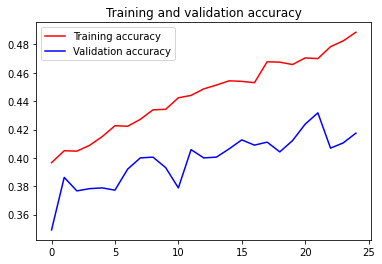

<Figure size 432x288 with 0 Axes>

overfitting problem solved but the model need to be more trained and optimized


In [20]:
#plot the second training and validation accuracy graphs 
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()
print('overfitting problem solved but the model need to be more trained and optimized')

In [ ]:
# by continuing the training, we see now the overfitting appear, the difference between the training test accuracy start to increase
# overfitting is the oposite of generalization of model prediction  
# in this case we need to feed our model more data and train it , or apply regularization or dropout on the neural network architecture